سنلقي اليوم نظرة على مصفوفتين x وy وذلك ما نحتاجه لتدريب المصنفات النصية لاحقا.

مبدئيا تتضمن بياناتنا معلومتين أساسيتين: أولا، النصوص التي نعمل عليها. وثانيا، التصنيف الذي ينتمي له كل نص. ونطلق على بياناتنا المستعملة (النصوص) *المصفوفة x x array*. كما نطلق على قائمة الوسوم التي ينتمي إليها كل نص *المصفوفة y y array *. فمثلا، عادة ما يكون الحديث في مكتبة *scikit-learn* عن x وy. وهذا يعني فقط اللغة والوسوم.


In [1]:
from text_analytics import TextAnalytics
import os
import pandas as pd

ai = TextAnalytics()
ai.data_dir = os.path.join("..", "data")
print("Done!")

Done!


وفي هذه المرة سنعمل على التغريدات وبيانات الويب التي تمثل دولا مختلفة حول العالم. إذن سنحمل أولا هذه البيانات في الذاكرة. وهي مدونة ضخمة جدا، ولذلك سنعمل على الصفوف الأولى منها فقط.

In [2]:
file = os.path.join(ai.data_dir, "sociolinguistics.english_dialects.gz")
df = pd.read_csv(file, nrows = 1000)
print(df)
print("Done!")

    Register    Country                                               Text
0         cc  Australia  the strategy has been the installation of gros...
1         cc  Australia  of the war rather than merely the military one...
2         cc  Australia  conducted by dpi walkamin and the eacham shire...
3         cc  Australia  framework is now being developed by farmsafe a...
4         cc  Australia  m disappointed about the relative lack of anar...
..       ...        ...                                                ...
995       cc  Australia  stock research in marine ecology american eel ...
996       cc  Australia  issue for further discussion of em tv s polici...
997       cc  Australia  of print manila soil and land resources apprai...
998       cc  Australia  we want to work with all groups and health pro...
999       cc  Australia  of reproductive a number of environmental para...

[1000 rows x 3 columns]
Done!


إذن لدينا الآن بياناتنا. وبدلا من عرض البيانات في جدول كامل أو تحت إطار معين مثل هذا سوف نفصل المصفوفات. وهنا نختار مصفوفات x (بيانات المدونة)، ومصفوفات y (التصنيفات).

In [3]:
x = df.loc[:,'Text']
y = df.loc[:,"Country"]

print(x)
print(y)

0      the strategy has been the installation of gros...
1      of the war rather than merely the military one...
2      conducted by dpi walkamin and the eacham shire...
3      framework is now being developed by farmsafe a...
4      m disappointed about the relative lack of anar...
                             ...                        
995    stock research in marine ecology american eel ...
996    issue for further discussion of em tv s polici...
997    of print manila soil and land resources apprai...
998    we want to work with all groups and health pro...
999    of reproductive a number of environmental para...
Name: Text, Length: 1000, dtype: object
0      Australia
1      Australia
2      Australia
3      Australia
4      Australia
         ...    
995    Australia
996    Australia
997    Australia
998    Australia
999    Australia
Name: Country, Length: 1000, dtype: object


ولذلك حين نستعمل لاحقا *scikit-learn* أو *tensorflow* لبناء النماذج، قد نستعمل هذا التركيب للحصول على مصفوفاتنا x وy. ولا يمكن طبعا أن ندرب مصنفا على النص وحده، إذ لا بد أولا من تمثيله متجهيا. ومن ثم نحول هنا المصفوفة x إلى خصائص باستعمال دالة معينة من حزمتنا *text_analytics*.

In [4]:
x, vocab_size = ai.get_features(df, features = "style")
print(x)
print(vocab_size)

  (0, 0)	58
  (0, 1)	32
  (0, 2)	25
  (0, 3)	31
  (0, 4)	19
  (0, 5)	14
  (0, 6)	1
  (0, 7)	6
  (0, 8)	7
  (0, 9)	5
  (0, 10)	7
  (0, 11)	3
  (0, 12)	7
  (0, 13)	10
  (0, 14)	3
  (0, 15)	14
  (0, 16)	4
  (0, 17)	8
  (0, 19)	3
  (0, 20)	4
  (0, 21)	6
  (0, 22)	9
  (0, 24)	6
  (0, 25)	5
  (0, 26)	3
  :	:
  (999, 151)	1
  (999, 159)	1
  (999, 160)	2
  (999, 161)	1
  (999, 163)	1
  (999, 166)	2
  (999, 167)	1
  (999, 171)	1
  (999, 176)	1
  (999, 198)	1
  (999, 200)	1
  (999, 202)	1
  (999, 204)	1
  (999, 205)	1
  (999, 219)	1
  (999, 228)	1
  (999, 239)	1
  (999, 248)	1
  (999, 250)	1
  (999, 251)	2
  (999, 286)	1
  (999, 290)	2
  (999, 295)	3
  (999, 299)	1
  (999, 319)	1
10095


والآن لدينا تمثيلا متجهيا لكل نص يضم 10,095 بعدا أو خاصية. وسنتعرف على أنواع متعددة من التمثيلات في الأنشطة القادمة:

*الأسلوب* دالة التتابع اللفظي لتمثيل الخيارات الأسلوبية.
*المشاعر* الكلمات الإيجابية والسلبية لتمثيل العواطف أو المشاعر.
*المحتوى* كلمات المحتوى الموزونة لتمثيل الموضوع.
*الأبنية* الخصائص التركيبية لتمثيل البنية اللغوية.


وتأتي دراسة الحالة في هذا الفصل من تصنيف اللهجة باستعمال الخصائص البنيوية. ويمكننا استخلاص هذا النوع من الخصائص باستعمال الكود البرمجي أدناه. وتتطلب هذه الخاصية التركيبية التحليلين التركيبي والدلالي معا. وحيث إن معالجتها تستغرق وقتا، سنلقي نظرة على عينات قليلة فقط.

In [5]:
x, vocab_size = ai.get_features(df.head(2), features = "constructions")
print(x)
print(vocab_size)

  (0, 8)	1
  (0, 26)	1
  (0, 51)	1
  (0, 58)	1
  (0, 65)	1
  (0, 87)	1
  (0, 98)	1
  (0, 108)	2
  (0, 122)	2
  (0, 123)	1
  (0, 129)	1
  (0, 155)	2
  (0, 169)	1
  (0, 185)	1
  (0, 187)	1
  (0, 195)	9
  (0, 223)	1
  (0, 255)	1
  (0, 258)	18
  (0, 263)	1
  (0, 270)	1
  (0, 286)	1
  (0, 338)	1
  (0, 343)	3
  (0, 365)	1
  :	:
  (1, 19377)	1
  (1, 19396)	1
  (1, 19401)	1
  (1, 19408)	1
  (1, 19448)	1
  (1, 19471)	1
  (1, 19504)	1
  (1, 19522)	1
  (1, 19534)	1
  (1, 19546)	4
  (1, 19565)	3
  (1, 19567)	1
  (1, 19568)	3
  (1, 19570)	1
  (1, 19573)	1
  (1, 19589)	2
  (1, 19631)	3
  (1, 19638)	1
  (1, 19653)	1
  (1, 19656)	3
  (1, 19674)	2
  (1, 19678)	2
  (1, 19693)	1
  (1, 19704)	1
  (1, 19712)	3
19713


وتمثل هذه الأرقام تكرارات الأبنية المختلفة في النصوص. ولنأخذ الآن نظرة على بعض أمثلتها.

In [6]:
import codecs
import random

cxg = {}
file = os.path.join(ai.data_dir, "cxg_examples.eng.Wiki.txt")
with codecs.open(file, "r", encoding = "utf-8") as f:
    for line in f:
        
        if len(line) > 3:
            if line[0] != "\t":
                construction = line.split("\t")[1]
                cxg[construction] = []
                
            else:
                token = line.split("\t")[-1]
                cxg[construction].append(token)

In [7]:
construction = random.choice(list(cxg.keys()))
print(construction)

for token in cxg[construction][:5]:
    print(token)

[ AUX -- been -- VERB -- DET ]

['had', 'been', 'used', 'a']

['has', 'been', 'called', 'a']

['have', 'been', 'linked', 'the']

['have', 'been', 'accepted', 'a']

['has', 'been', 'holding', 'the']



إذن هذه الخصائص البنيوية هي عدد قليل من الأبنية التركيبية القائمة على الاستعمال. فما مدى جودة الوقوف على الاختلافات بين اللهجات من خلالها؟ لنر الآن دقة التصنيف للنموذج بعد اختباره على مجموعة بيانات اختبار منفصلة. وقد درب باستعمال الانحدار اللوجيستي كما هو موضح في المباحث الآتية.

In [8]:
file = os.path.join(ai.data_dir, "dialect_results.csv")
results_df = pd.read_csv(file, nrows=12)
print(results_df)

           Country  Precision  Recall  F1-Score  Support
0        Australia       0.87    0.88      0.88     3044
1           Canada       0.89    0.88      0.89     3012
2            India       0.97    0.98      0.98     2950
3          Ireland       0.97    0.96      0.97     3063
4         Malaysia       1.00    0.99      1.00     1616
5      New Zealand       0.89    0.89      0.89     3030
6          Nigeria       0.98    0.98      0.98     2700
7         Pakistan       0.98    0.98      0.98     2933
8      Philippines       0.98    0.98      0.98     1750
9     South Africa       0.95    0.95      0.95     3007
10  United Kingdom       0.91    0.93      0.92     3011
11   United States       0.89    0.90      0.90     2970


وتعني Support"" هنا عدد العينات في عينة الاختبار لكل تصنيف. إذن هنالك ما إجماليه 33,086 عينة اختبار. ولنستعملها الآن لبناء الأشكال التي اطلعنا عليها في المبحث.

(0.0, 1.0)

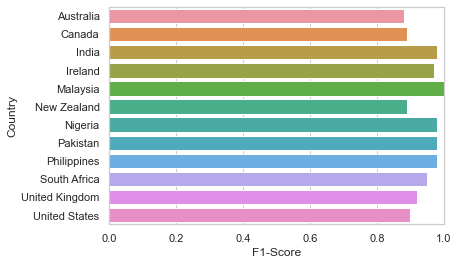

In [9]:
%matplotlib inline
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib import rcParams
sns.set_theme(style="whitegrid")

sns.barplot(y="Country", x="F1-Score", data=results_df)

# figure size in inches
rcParams['figure.figsize'] = 11.7,8.27
plt.xlim(0, 1)

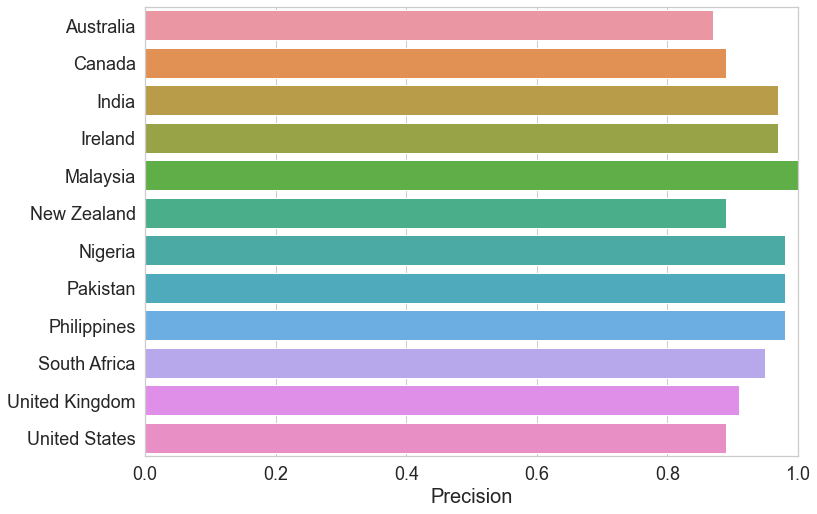

In [10]:
sns.barplot(y="Country", x="Precision", data=results_df)

# figure size in inches
rcParams['figure.figsize'] = 11.7,8.27
plt.xlim(0, 1)
plt.xlabel("Precision",size=20)
plt.ylabel("",size=20)
plt.tick_params(axis='both', which='major', labelsize=18)

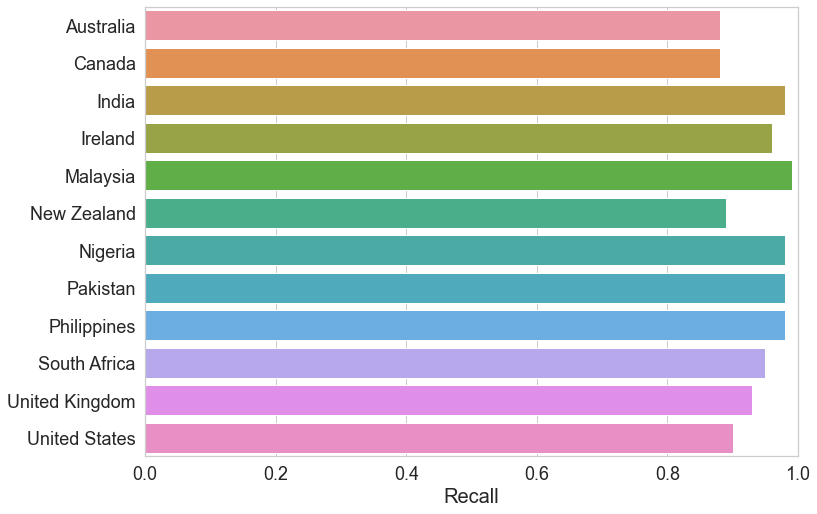

In [11]:
sns.barplot(y="Country", x="Recall", data=results_df)

# figure size in inches
rcParams['figure.figsize'] = 11.7,8.27
plt.xlim(0, 1)
plt.xlabel("Recall",size=20)
plt.ylabel("",size=20)
plt.tick_params(axis='both', which='major', labelsize=18)

وتنمذِج تلك النتائج اللهجة باستعمال تغريدات من موقع معين. ولكن إلى أي مدى تمثل هذه البيانات الرقمية المجموع اللغوي الواقعي لمستعملي اللغة؟ تتمثل إحدى طرائق تناول هذا السؤال في نمذجة نفس اللهجات باستعمال مصدر بديل للتمثيلات: بيانات من الويب مثلا. وهذه مجموعة مستقلة من الملاحظات. فإذا اتفقت النتائج في غالبها، جاء ذلك مؤشرا على أن لدينا مصدرين مستقلبن يمثلان نفس الأنماط التركيبية.

In [12]:
file = os.path.join(ai.data_dir, "dialect_results_web.csv")
results_web_df = pd.read_csv(file, nrows=12)
print(results_web_df)

           Country  Precision  Recall  F1-Score  Support
0        Australia       0.89    0.91      0.90     5718
1           Canada       0.92    0.91      0.91     5962
2            India       0.96    0.97      0.97     6051
3          Ireland       0.98    0.97      0.98     5939
4         Malaysia       0.98    0.96      0.97     4660
5      New Zealand       0.86    0.88      0.87     5902
6          Nigeria       0.97    0.98      0.97     5702
7         Pakistan       0.99    0.98      0.98     6022
8      Philippines       0.98    0.97      0.98     4785
9     South Africa       0.94    0.93      0.94     2997
10  United Kingdom       0.91    0.90      0.91     2904
11   United States       0.90    0.89      0.89     3112


           Country  Precision  Recall  F1-Score  Support Source
0        Australia       0.87    0.88      0.88     3044     TW
1           Canada       0.89    0.88      0.89     3012     TW
2            India       0.97    0.98      0.98     2950     TW
3          Ireland       0.97    0.96      0.97     3063     TW
4         Malaysia       1.00    0.99      1.00     1616     TW
5      New Zealand       0.89    0.89      0.89     3030     TW
6          Nigeria       0.98    0.98      0.98     2700     TW
7         Pakistan       0.98    0.98      0.98     2933     TW
8      Philippines       0.98    0.98      0.98     1750     TW
9     South Africa       0.95    0.95      0.95     3007     TW
10  United Kingdom       0.91    0.93      0.92     3011     TW
11   United States       0.89    0.90      0.90     2970     TW
0        Australia       0.89    0.91      0.90     5718    WEB
1           Canada       0.92    0.91      0.91     5962    WEB
2            India       0.96    0.97   

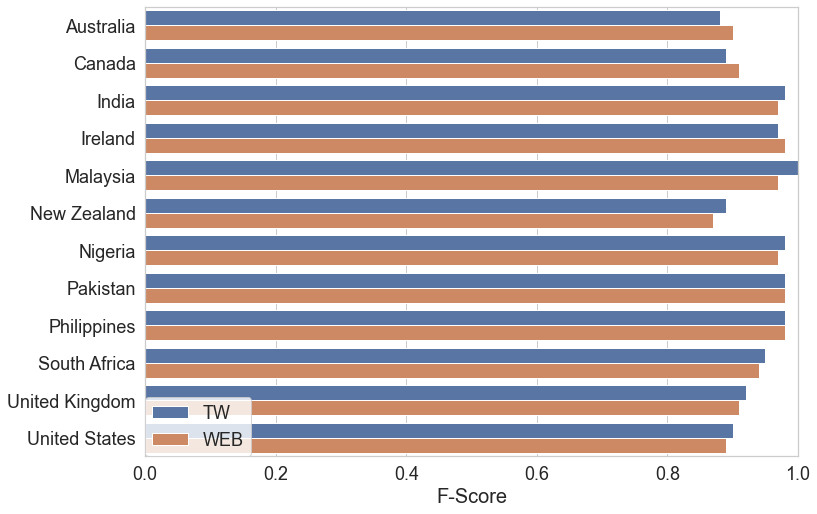

In [13]:
results_df["Source"] = "TW"
results_web_df["Source"] = "WEB"
joint_df = pd.concat([results_df, results_web_df], axis=0)
print(joint_df)

sns.barplot(y="Country", x="F1-Score", hue="Source", data=joint_df)

# figure size in inches
rcParams['figure.figsize'] = 11.7,8.27
plt.xlim(0, 1)
plt.xlabel("F-Score",size=20)
plt.ylabel("",size=20)
plt.tick_params(axis='both', which='major', labelsize=18)
plt.legend(loc='lower left', fontsize=18, borderaxespad=0)

وعندما نقارن النماذج اللهجية التي تنتج من هذين المصدرين، نجدها متشابهة جدا. وهذا يحقق لنا الثقة في النتائج؛ لأننا نرى اتفاقا واضحا بين مصدرين مختلفين من البيانات.